IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


The goal of this Quest is to do a one step ahead forecast of the Miles Traveled data. 
## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv". Figure out how to set the date to a datetime index columns

In [1]:
# Load dataset and set app name as index
path="https://raw.githubusercontent.com/crajapax/GDAtrack3b/main/Miles_Traveled.csv"

In [3]:
# read data
# set the date as the index of our dataframe, ie. each of our datapoints correspond to a date
data = pd.read_csv(path, index_col=0, parse_dates=True)


data.index.freq = 'MS'


In [4]:
data = pd.read_csv(path, parse_dates=True)
#set the date as the index of our dataframe, ie. each of our datapoints correspond to a date
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace= True)
data.index.freq = 'MS'


In [5]:
data.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [6]:
# CODE HERE
data = data.rename(columns={"TRFVOLUSM227NFWA":"Value"})


**TASK: Plot out the time series**

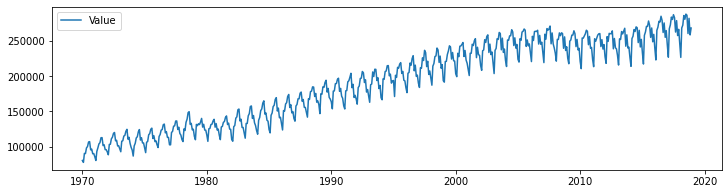

In [7]:
# CODE HERE

plt.figure(figsize=(12,3))
plt.plot(data, label='Value')
plt.legend()
plt.show()

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

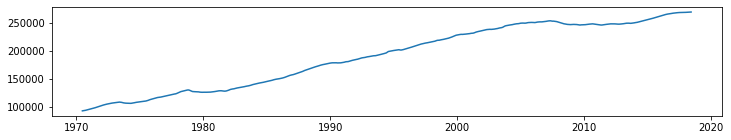

In [8]:
# CODE HERE
plt.figure(figsize=(12,2))
data_decomp = seasonal_decompose(data)
plt.plot(data_decomp.trend)

plt.show()

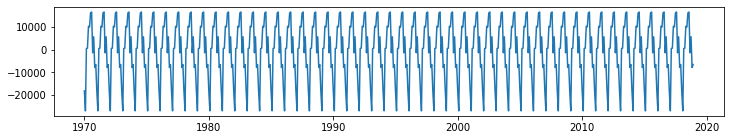

In [9]:
plt.figure(figsize=(12,2))
plt.plot(data_decomp.seasonal)
plt.show()

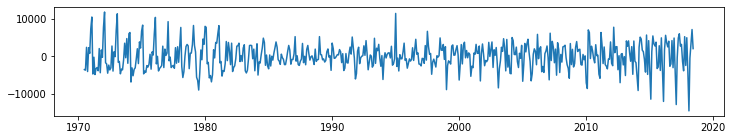

In [10]:
plt.figure(figsize=(12,2))
plt.plot(data_decomp.resid )

plt.show()

## Train Test Split

**TASK: Figure out the length of the data set**

In [11]:
# CODE HERE
len(data)

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [12]:
data.tail(12)

,Value
DATE,
2018-01-01,245695.0
2018-02-01,226660.0
2018-03-01,268480.0
2018-04-01,272475.0
2018-05-01,286164.0
2018-06-01,280877.0
2018-07-01,288145.0
2018-08-01,286608.0
2018-09-01,260595.0


In [13]:
# CODE HERE
test = data.tail(12)
train = data.head(len(data)-len(test))
len(test), len(train)

(12, 576)

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [14]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range = (0, 1), )
scaler.get_params()

{'clip': False, 'copy': True, 'feature_range': (0, 1)}

In [15]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [16]:
type(scaled_train), len(scaled_train)

(numpy.ndarray, 576)

# Time Series Generator

We Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12. n_input refers to the window size, ie. length of your sequence. 
We want to do a one step ahead forecast.

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [18]:
n_input = 16 # you might need to test a variety of input values and test performance, 
#but at least 12 to capture one cycle of seasonality

n_features=1 # for univariate time series always 1

# Create input data from time series with generator object
# we put in the train data 2, once as actual train data, once as target variable, specify window length =n_input
# smaller batch sizes tend to work better 
# CAREFUL: adjust the following 'scaled_train' to the name of your train object

generator = TimeseriesGenerator(scaled_train, scaled_train, sampling_rate=1, length=n_input, batch_size=1, )


TASK: inspect the output of the TimeSeriesGenerator

In [19]:
generator.get_config()

{'data': '[[0.013010895612693585], [0.0], [0.060890610335348594], [0.0596185820934631], [0.09780801425433894], [0.10763645718695958], [0.1379221633055584], [0.14067107827023217], [0.08485905260098808], [0.08992334481493658], [0.0583227330979843], [0.0594041953111229], [0.037608205773197845], [0.012748867323166657], [0.07399678896241563], [0.09844641045064101], [0.12488268278855269], [0.1333533427663518], [0.16685961477077293], [0.16769810529725915], [0.11361546633889313], [0.11949919247645319], [0.0862930619673084], [0.08610249593856151], [0.07157183624661151], [0.05159575228321922], [0.12140961691464075], [0.12289603193886645], [0.1596133415276726], [0.17066617119499194], [0.1960543303747958], [0.20233824517272425], [0.1459259365129275], [0.14958956841558646], [0.11123815513027568], [0.11242442865922508], [0.09157650511431581], [0.07205777961991605], [0.14315320079466032], [0.14615461574742383], [0.17806966141180847], [0.18302437815922745], [0.2107803202462113], [0.22383885736609166],

In [20]:
# As result, we get a set of tuples (x, y) which we can enumerate and index
print('Length of the output is {}.'.format(len(generator)))

demo_x0 = generator[0][0]
demo_y0 = generator[0][1]

demo_x0, demo_y0


Length of the output is 560.


(array([[[0.0130109 ],
         [0.        ],
         [0.06089061],
         [0.05961858],
         [0.09780801],
         [0.10763646],
         [0.13792216],
         [0.14067108],
         [0.08485905],
         [0.08992334],
         [0.05832273],
         [0.0594042 ],
         [0.03760821],
         [0.01274887],
         [0.07399679],
         [0.09844641]]]),
 array([[0.12488268]]))

In [21]:
generator[0][0].shape


(1, 16, 1)

### Create the Model

Create a Keras Sequential Model with as many LSTM units as you want and a final Dense Layer. 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout, BatchNormalization

In [23]:
def lstm_model(input_shape):
  #write code here
  #for simplicity you can use the default stateful argument in the LSTM layer and not worry about this argument here
  model = Sequential()
  model.add(LSTM(150, input_shape=input_shape, activation='tanh'))
  # Adding regularization (BatchNormalization + Dropout)
  #model.add(BatchNormalization())
  #model.add(Dropout(0.2))

  # Output layer (1 unit)
  # No activation function -> this is a regression problem
  model.add(Dense(units=1))

  return model

In [24]:
model= lstm_model(input_shape=(generator[0][0].shape[1], 1))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 150)               91200     
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# =============================================================================
# Compile and train model
# =============================================================================

from tensorflow.keras.optimizers import Adam

# use adam with lr 0.001
optimizer = Adam(lr=0.001)

# use metrics 'mean_absolute_percentage_error'
metrics = ["mean_absolute_percentage_error"]

loss = "mean_squared_error"

model.compile(
    optimizer=optimizer,
    metrics=metrics,
    loss=loss
)


Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [26]:
# fit model
history = model.fit_generator(generator,epochs=30)

/shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
Epoch 1/30
560/560 [==============================] - 17s 25ms/step - loss: 0.0317 - mean_absolute_percentage_error: 24.1333
Epoch 2/30
560/560 [==============================] - 14s 25ms/step - loss: 0.0054 - mean_absolute_percentage_error: 14.1117
Epoch 3/30
560/560 [==============================] - 14s 26ms/step - loss: 0.0028 - mean_absolute_percentage_error: 10.5175
Epoch 4/30
560/560 [==============================] - 12s 22ms/step - loss: 0.0029 - mean_absolute_percentage_error: 10.6415
Epoch 5/30
560/560 [==============================] - 14s 25ms/step - loss: 0.0024 - mean_absolute_percentage_error: 9.4909
Epoch 6/30
560/560 [==============================] - 15s 26ms/step - los

**TASK: Plot the history of the loss that occured during training.**

In [27]:
# CODE HERE
history.history.keys()

dict_keys(['loss', 'mean_absolute_percentage_error'])

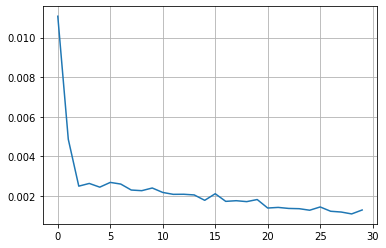

In [28]:
plt.plot(history.history.get('loss'))
plt.grid()
plt.show()

# Evaluate on Test Data

Based on your test data and input size, create an appropriately sized "first evaluation batch"

In [29]:
first_eval_batch = scaled_train[-n_input:]

In [30]:
first_eval_batch

array([[0.87944793],
       [0.94410222],
       [0.84664675],
       [0.89249694],
       [0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [31]:
# reshape the data to get it into the 3 dimensional shape needed for the keras model and model.predict()
# same dim as TimeSeriesGenerator output 
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

**TASK: predict the first point of the test dataset**

In [32]:
# Code here
p= model.predict(first_eval_batch)[0]
p

array([0.8105498], dtype=float32)

In [33]:
scaled_test[0]

array([0.80158265])

## Now let's put this logic in a for loop to predict into the future for the entire test range.


**TASK: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [34]:
# FORECAST USING RNN MODEL

 # list for holding predictions
test_predictions = []

current_batch = first_eval_batch

# how far into future will you foreacst (here just len test) 
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead of historical 12 points ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store that  prediction
    test_predictions.append(current_pred)

    #print(current_batch[-1], current_pred)
    
    # update current batch to now include prediction and drop first value
    # append current prediction and this is all the code we need to forecast into the future, ie. into the testset 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions to retrieve back the original and not the scaled values**

In [35]:
test_predictions

[array([0.8105498], dtype=float32),
 array([0.71245694], dtype=float32),
 array([0.9578522], dtype=float32),
 array([0.9402555], dtype=float32),
 array([0.9824209], dtype=float32),
 array([1.0064874], dtype=float32),
 array([0.9890836], dtype=float32),
 array([0.9707524], dtype=float32),
 array([0.94893414], dtype=float32),
 array([0.932802], dtype=float32),
 array([0.91776955], dtype=float32),
 array([0.89325786], dtype=float32)]

In [37]:
# invert scale to get back true predicted values! 
#CODE HERE
test_predictions_inverse = scaler.inverse_transform(test_predictions)
test_predictions_inverse

array([[247577.21265203],
       [226987.42449975],
       [278496.13143593],
       [274802.57447612],
       [283653.13380718],
       [288704.70535326],
       [285051.63423067],
       [281203.90329927],
       [276624.22446281],
       [273238.0771156 ],
       [270082.74658263],
       [264937.71730971]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [38]:
# CODE HERE

df_pred = test.copy()

df_pred['Predictions'] = test_predictions_inverse.round(0)
df_pred

,Value,Predictions
DATE,,
2018-01-01,245695.0,247577.0
2018-02-01,226660.0,226987.0
2018-03-01,268480.0,278496.0
2018-04-01,272475.0,274803.0
2018-05-01,286164.0,283653.0
2018-06-01,280877.0,288705.0
2018-07-01,288145.0,285052.0
2018-08-01,286608.0,281204.0
2018-09-01,260595.0,276624.0


**TASK: Plot out the test set against your own predicted values.**

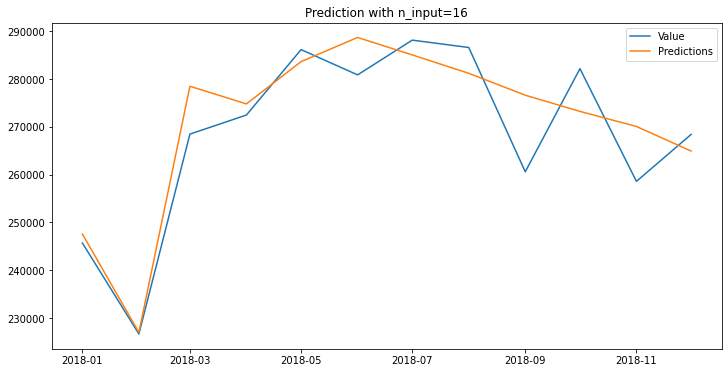

In [39]:
# CODE HERE
plt.figure(figsize=(12,6))
plt.title(f'Prediction with n_input={n_input}')
plt.plot(df_pred['Value'], label='Value')
plt.plot(df_pred['Predictions'], label='Predictions')
plt.legend()
plt.show()

# Saving Models

**TASK: Optional, Save your model!**

In [40]:
model.save(f'/work/model_{n_input}')

INFO:tensorflow:Assets written to: /work/model_16/assets
INFO:tensorflow:Assets written to: /work/model_16/assets


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a109ea11-a7da-42aa-8af0-3a0cdafc917e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>